# Spaceship Titanic

- https://www.kaggle.com/competitions/spaceship-titanic/overview

- PassengerId- 각 승객의 고유 ID. 각 Id는 승객이 함께 여행하는 그룹을 나타내고 그룹 내의 번호를 gggg_pp나타내는 형식을 취합니다. 그룹의 사람들은 종종 가족 구성원이지만 항상 그런 것은 아닙니다.ggggpp
- HomePlanet- 승객이 출발한 행성으로, 일반적으로 승객이 거주하는 행성입니다.
- CryoSleep- 저온수면. cryosleep의 승객은 객실에 갇혀 있습니다.
- Cabin- 승객이 머무르는 캐빈 번호. 형식을 취합니다 deck/num/side. 여기 에서 Port 또는 Starboard 가 side될 수 있습니다 .PS
- Destination- 승객이 내릴 행성.
- Age- 승객의 나이.
- VIP- 승객이 항해 중 특별 VIP 서비스 비용을 지불했는지 여부.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck- 승객이 Spaceship Titanic 의 다양한 고급 편의 시설 각각에 대해 청구한 금액입니다.
- Name- 승객의 성과 이름.
- Transported- 승객이 다른 차원으로 이동했는지 여부. 이것은 목표, 예측하려는 열입니다.


```
sample_submission.csv - 올바른 형식의 제출 파일이다.
PassengerId- 테스트 세트의 각 승객에 대한 ID입니다.
Transported- 목표. 각 승객에 대해 True또는 False 을 예측한다.
```

### 필요한 모듈 import

In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.10.0


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 데이터 import

In [3]:
train = pd.read_csv("../data/space/train.csv")
test = pd.read_csv("../data/space/test.csv")
submission = pd.read_csv("../data/space/sample_submission.csv")

In [4]:
print(train.shape)
train.head()

(8693, 14)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
print(test.shape)
test.head()

(4277, 13)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [6]:
print(submission.shape)
submission.head()

(4277, 2)


,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


### EDA

In [7]:
# 간간히 결측치가 있는 것 같다.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
# 결측치가 꽤 많아서 다 처리해 줘야 할듯??
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [9]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [10]:
train.describe(include="object")

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


#### 의문

- age 가 0인건, 결측치일까 아니면 정말 0 살일까?
- cryosleep 선택한 사람들은 어떤 패턴을 보일까?
- cabin 은 deck/num/side 로 데이터 분리가 필요해보인다. 

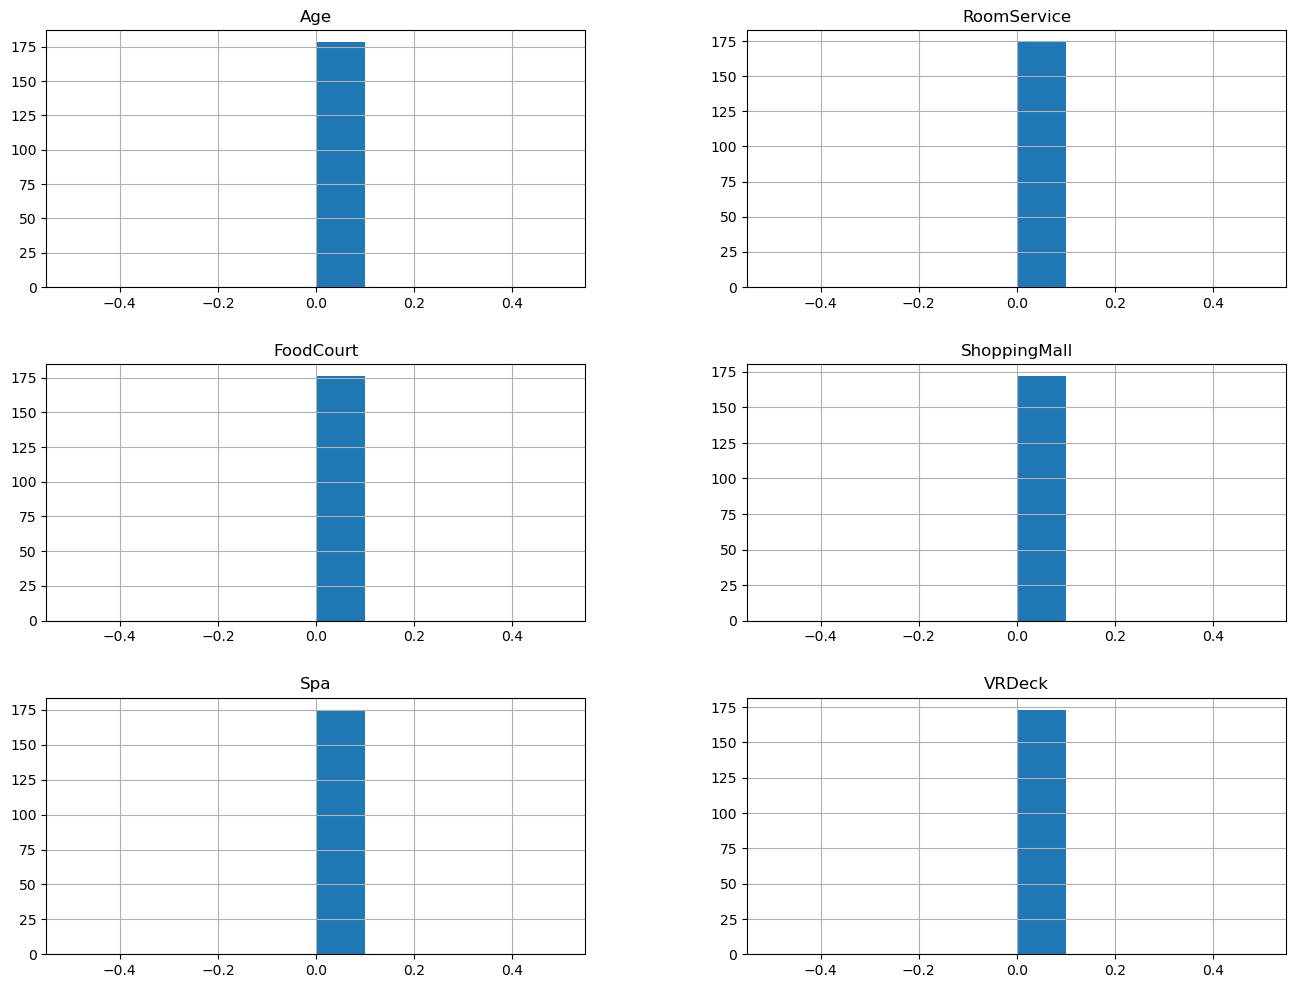

In [12]:
_ = train[train["Age"] == 0].hist(figsize=(16, 12))

In [13]:
train[train["Age"] == 0].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,178.0,174.0,176.0,172.0,175.0,173.0
mean,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0


-> Age 가 0 인것은 결측치가 아니고 그냥 0살인 것 같다. 

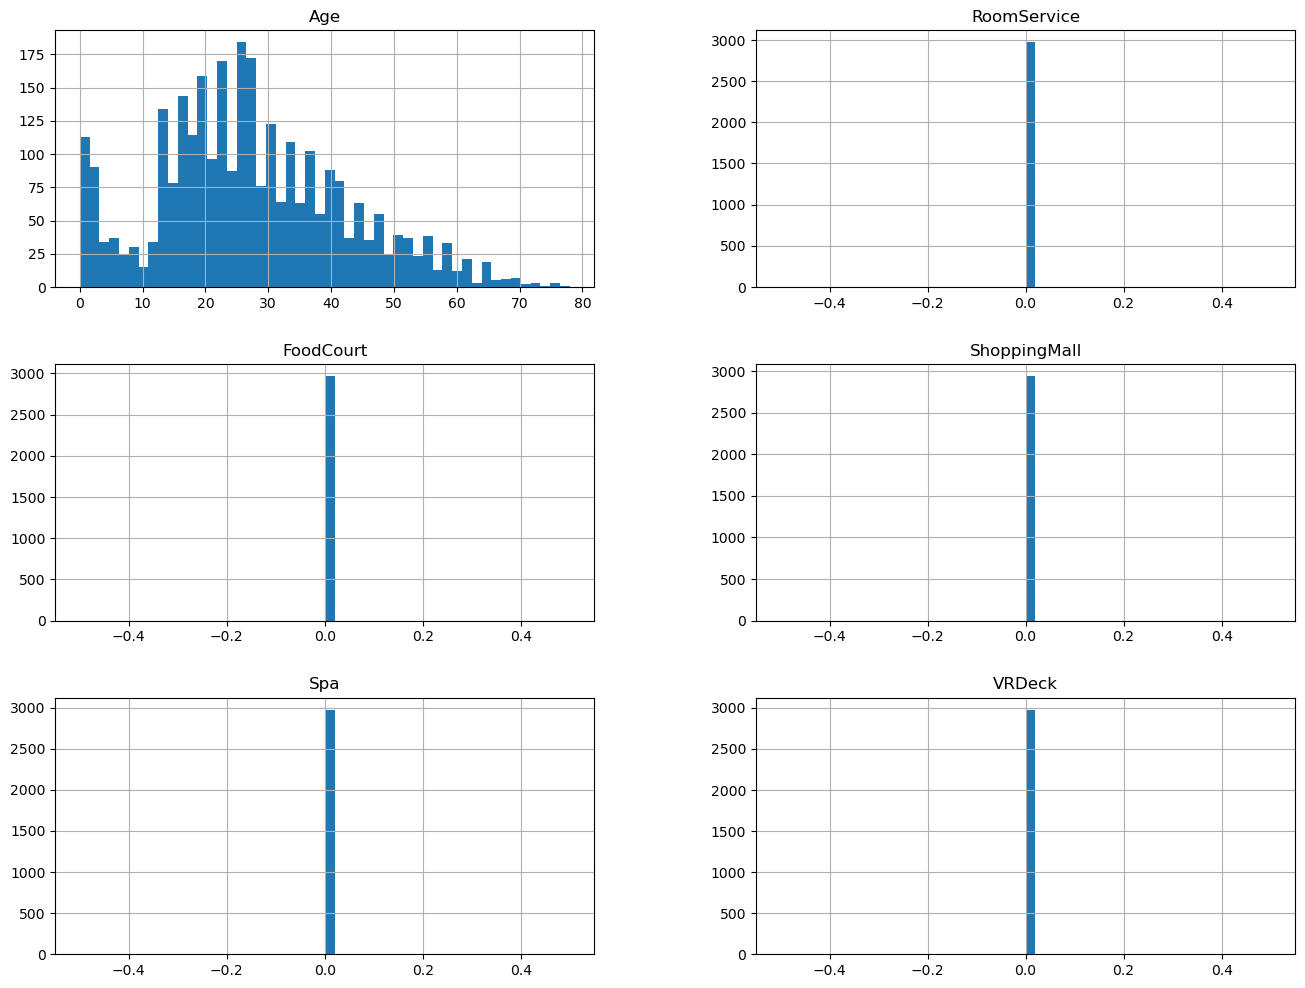

In [15]:
_ = train[train["CryoSleep"] == True].hist(figsize=(16,12), bins=50)

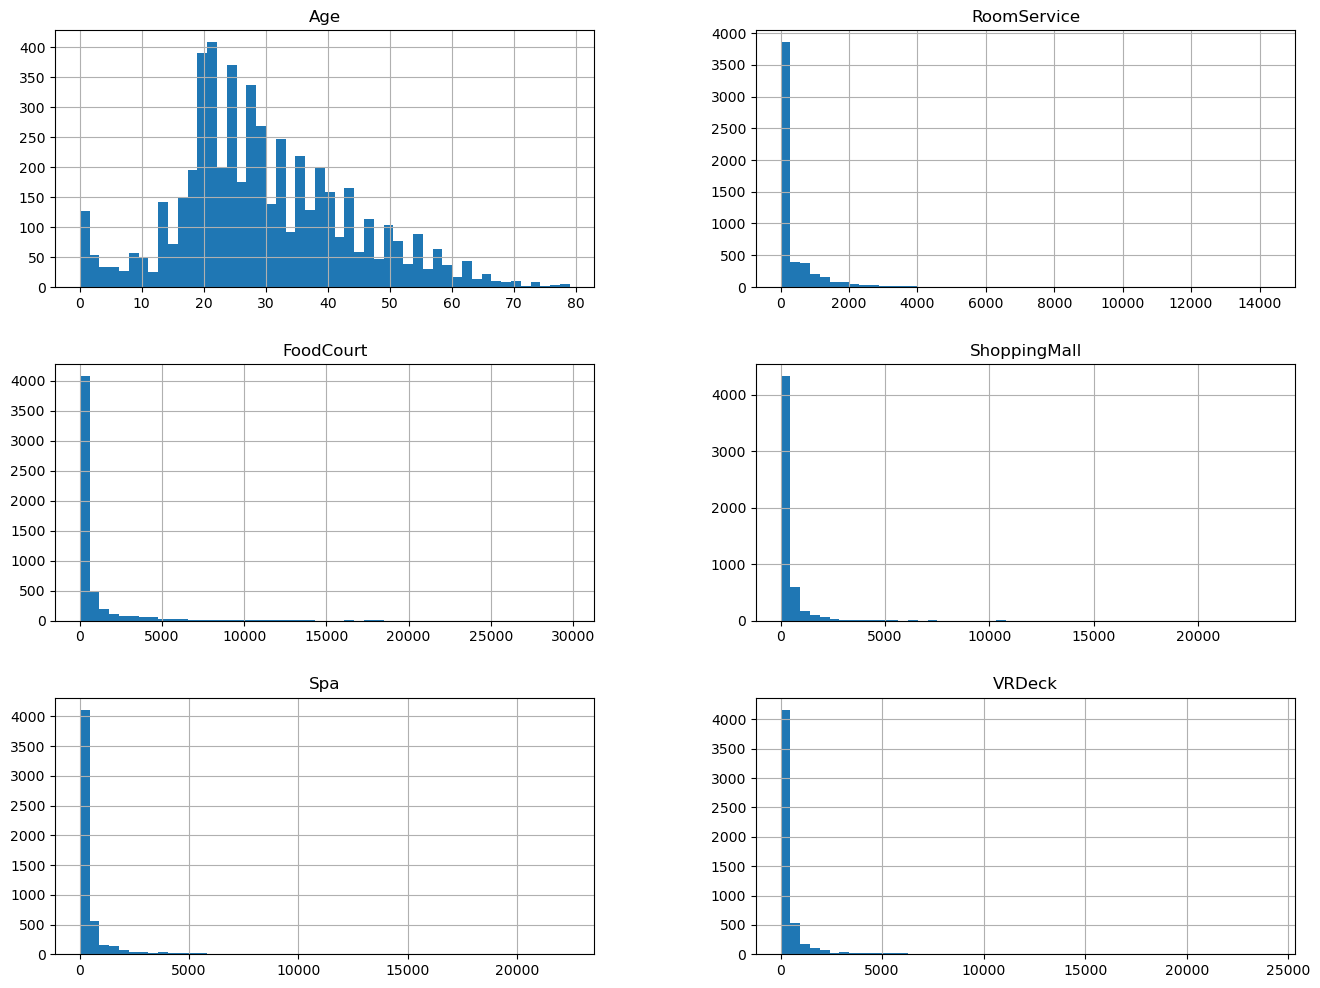

In [16]:
_ = train[train["CryoSleep"] == False].hist(figsize=(16,12), bins=50)

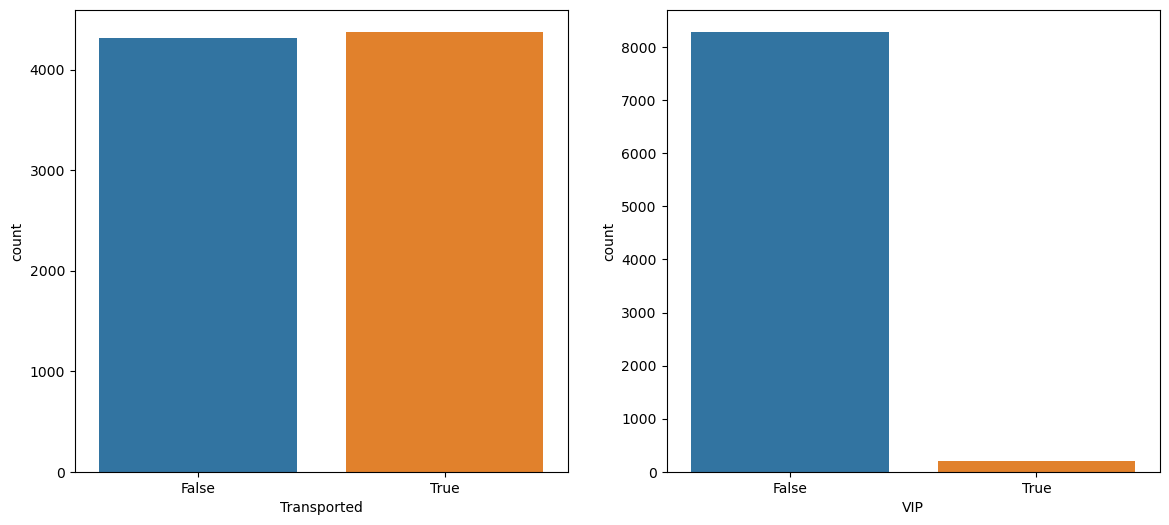

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
_ = sns.countplot(data=train, x="Transported", ax=axes[0])
_ = sns.countplot(data=train, x="VIP", ax=axes[1])

### 데이터 전처리 하고, 필사를 해보자
- https://www.kaggle.com/code/nnsssadithya/space-nn

### 파생변수 만들기

In [18]:
train["deck"] = train.loc[~train["Cabin"].isnull(), "Cabin"].map(lambda x: x.split("/")[0])
train["num"] = train.loc[~train["Cabin"].isnull(), "Cabin"].map(lambda x: x.split("/")[1]).astype(int)
train["side"] = train.loc[~train["Cabin"].isnull(), "Cabin"].map(lambda x: x.split("/")[2])

In [19]:
test["deck"] = test.loc[~test["Cabin"].isnull(), "Cabin"].map(lambda x: x.split("/")[0])
test["num"] = test.loc[~test["Cabin"].isnull(), "Cabin"].map(lambda x: x.split("/")[1]).astype(int)
test["side"] = test.loc[~test["Cabin"].isnull(), "Cabin"].map(lambda x: x.split("/")[2])

In [22]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,num
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8494.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,600.367671
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,511.867226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,167.250000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,427.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,999.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1894.000000


### 결측치 채우기

In [23]:
cols = ["CryoSleep","Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck", "num"]
for col in cols:
    train[col].fillna(train[col].median(),inplace=True)
    test[col].fillna(test[col].median(),inplace=True)

In [48]:
train["deck"] = train["deck"].interpolate(method='pad')
test["deck"] = test["deck"].interpolate(method='pad')

train["side"] = train["side"].interpolate(method='pad')
test["side"] = test["side"].interpolate(method='pad')

train["HomePlanet"] = train["HomePlanet"].interpolate(method='pad')
test["HomePlanet"] = test["HomePlanet"].interpolate(method='pad')

In [42]:
cols = ["CryoSleep","VIP"]
for col in cols:
    train[col] = train[col].replace({True:1,False:0})
    test[col] = test[col].replace({True:1,False:0})

In [45]:
train.CryoSleep.fillna(False,inplace=True)
train.VIP.fillna(False,inplace=True)
train.Transported.fillna(False,inplace=True)

test.CryoSleep.fillna(False,inplace=True)
test.VIP.fillna(False,inplace=True)

### 원핫인코딩

In [75]:
features = ['HomePlanet', 'CryoSleep', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'deck', 'num', 'side']

object_features=["HomePlanet", "Destination", "VIP", "deck", "side"]
num_fieatures = ['CryoSleep', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'num']

label_name = "Transported"

In [94]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore', drop="first", dtype="int32")
train_ohe = ohe.fit_transform(train[object_features]).toarray()
train_ohe = pd.DataFrame(train_ohe, columns=ohe.get_feature_names_out())
train_ohe

,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_nan,VIP_1.0,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_S
0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
2,1,0,0,1,0,1,0,0,0,0,0,0,0,1
3,1,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,0,0,1,0,0,0,0,0,0,0,0
8689,0,0,1,0,0,0,0,0,0,0,0,1,0,1
8690,0,0,0,1,0,0,0,0,0,0,0,1,0,1
8691,1,0,0,0,0,0,0,0,0,1,0,0,0,1


In [95]:
test_ohe = ohe.transform(test[object_features]).toarray()
test_ohe = pd.DataFrame(test_ohe, columns=ohe.get_feature_names_out())
test_ohe

c:\Users\chjy1\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_nan,VIP_1.0,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_S
0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3,1,0,0,1,0,0,0,1,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,0,0,1,0,0,0,0,0,0,0,1,0,1
4273,0,0,0,1,0,0,0,0,0,0,0,1,0,1
4274,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4275,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [96]:
X_test = pd.concat([test_ohe, test[num_fieatures]], axis=1)
X_test

,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_nan,VIP_1.0,deck_B,deck_C,deck_D,deck_E,...,deck_T,side_S,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,num
0,0,0,0,1,0,0,0,0,0,0,...,0,1,1,27.0,0.0,0.0,0.0,0.0,0.0,3.0
1,0,0,0,1,0,0,0,0,0,0,...,0,1,0,19.0,0.0,9.0,0.0,2823.0,0.0,4.0
2,1,0,0,0,0,0,0,1,0,0,...,0,1,1,31.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,1,0,0,0,1,0,0,...,0,1,0,38.0,0.0,6652.0,0.0,181.0,585.0,1.0
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,20.0,10.0,0.0,635.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,0,0,1,0,0,0,0,0,0,...,0,1,1,34.0,0.0,0.0,0.0,0.0,0.0,1496.0
4273,0,0,0,1,0,0,0,0,0,0,...,0,1,0,42.0,0.0,847.0,17.0,10.0,144.0,442.0
4274,0,1,0,0,0,0,0,0,1,0,...,0,0,1,26.0,0.0,0.0,0.0,0.0,0.0,296.0
4275,1,0,0,0,1,0,0,0,1,0,...,0,0,0,26.0,0.0,2680.0,0.0,0.0,523.0,297.0


In [97]:
X = pd.concat([train_ohe, train[num_fieatures]], axis=1)

In [98]:
set(X.columns) - set(X_test.columns)

set()

In [92]:
# X = pd.get_dummies(train[features], drop_first=True)
y = train[label_name].replace({True:1,False:0})
y[:5]

0    0
1    1
2    0
3    0
4    1
Name: Transported, dtype: int64

In [99]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   HomePlanet_Europa          8693 non-null   int32  
 1   HomePlanet_Mars            8693 non-null   int32  
 2   Destination_PSO J318.5-22  8693 non-null   int32  
 3   Destination_TRAPPIST-1e    8693 non-null   int32  
 4   Destination_nan            8693 non-null   int32  
 5   VIP_1.0                    8693 non-null   int32  
 6   deck_B                     8693 non-null   int32  
 7   deck_C                     8693 non-null   int32  
 8   deck_D                     8693 non-null   int32  
 9   deck_E                     8693 non-null   int32  
 10  deck_F                     8693 non-null   int32  
 11  deck_G                     8693 non-null   int32  
 12  deck_T                     8693 non-null   int32  
 13  side_S                     8693 non-null   int32

### hold out 방식 데이터 나누기

In [100]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((6954, 22), (1739, 22), (6954,), (1739,))

### 딥러닝 모델 생성!

In [102]:
input_shape = X.shape[1]
input_shape

22

In [105]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, input_dim=input_shape,activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1024, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model._name = "Space_NN"
model.summary()

Model: "Space_NN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                736       
                                                                 
 dense_11 (Dense)            (None, 128)               4224      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 1024)              132096    
                                                                 
 dropout_5 (Dropout)         (None, 1024)              0         
                                                                 
 dense_13 (Dense)            (None, 128)               131200    
                                                                 
 dense_14 (Dense)            (None, 1)                 129

In [108]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
              optimizer=tf.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

In [109]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

hist = model.fit(X_train, y_train, epochs=1000, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/1000
174/174 [==============================] - 12s 36ms/step - loss: 0.8477 - accuracy: 0.6858 - val_loss: 0.5405 - val_accuracy: 0.7944
Epoch 2/1000
174/174 [==============================] - 5s 29ms/step - loss: 0.5871 - accuracy: 0.7377 - val_loss: 0.5156 - val_accuracy: 0.7973
Epoch 3/1000
174/174 [==============================] - 3s 15ms/step - loss: 0.5584 - accuracy: 0.7577 - val_loss: 0.5002 - val_accuracy: 0.7922
Epoch 4/1000
174/174 [==============================] - 4s 23ms/step - loss: 0.5530 - accuracy: 0.7701 - val_loss: 0.5094 - val_accuracy: 0.7937
Epoch 5/1000
174/174 [==============================] - 4s 22ms/step - loss: 0.5331 - accuracy: 0.7699 - val_loss: 0.4780 - val_accuracy: 0.7958
Epoch 6/1000
174/174 [==============================] - 4s 21ms/step - loss: 0.5224 - accuracy: 0.7710 - val_loss: 0.4713 - val_accuracy: 0.8009
Epoch 7/1000
174/174 [==============================] - 3s 18ms/step - loss: 0.5224 - accuracy: 0.7784 - val_loss: 0.4685 - val_a

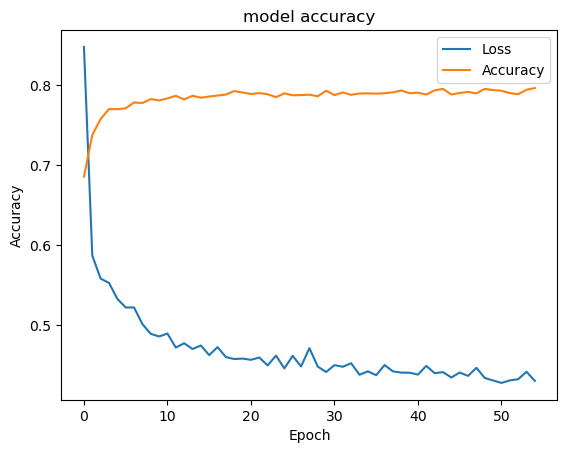

In [110]:
plt.plot(hist.history["loss"])
plt.plot(hist.history['accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Loss","Accuracy"])
plt.show()

In [111]:
df_hist = pd.DataFrame(hist.history)
df_hist.tail()

,loss,accuracy,val_loss,val_accuracy
50,0.428193,0.792917,0.426789,0.798706
51,0.431337,0.790041,0.427253,0.805176
52,0.432834,0.788603,0.421966,0.795111
53,0.442124,0.794176,0.436845,0.797268
54,0.430755,0.796333,0.408616,0.804457


<AxesSubplot:>

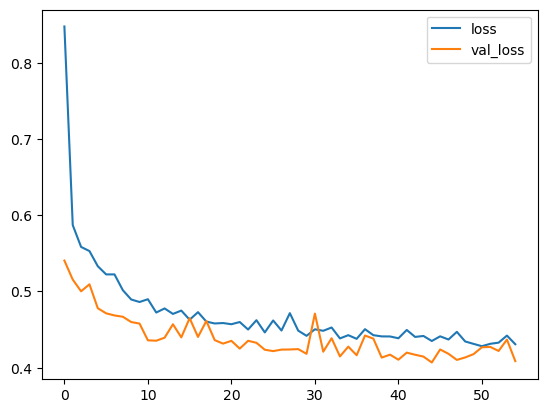

In [112]:
df_hist[["loss", "val_loss"]].plot()

<AxesSubplot:>

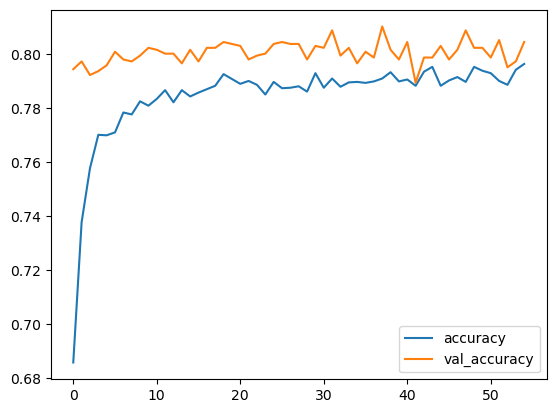

In [113]:
df_hist[["accuracy", "val_accuracy"]].plot()

### 검증해보기

In [132]:
y_pred = model.predict(X_valid)
y_pred[:5]

55/55 [==============================] - 7s 3ms/step


array([[0.13793696],
       [0.61481684],
       [0.7103782 ],
       [0.5931712 ],
       [0.94761276]], dtype=float32)

In [133]:
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
y_pred = y_pred.astype(int)
y_pred = y_pred.flatten()
y_pred

array([0, 1, 1, ..., 0, 1, 0])

In [134]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_valid, y_pred)
score

0.7866589994249569

### 제출해보기

In [135]:
prediction = model.predict(X_test)

134/134 [==============================] - 6s 6ms/step


In [136]:
prediction

array([[0.4768189 ],
       [0.01519432],
       [0.99700165],
       ...,
       [0.95110756],
       [0.76762366],
       [0.76479036]], dtype=float32)

In [137]:
prediction[prediction > 0.5] = 1
prediction[prediction <= 0.5] = 0
prediction = prediction.astype(int)
prediction = prediction.flatten()
prediction

array([0, 0, 1, ..., 1, 1, 1])

In [138]:
prediction_s = pd.Series(prediction).replace({1:True,0:False})
prediction_s

0       False
1       False
2        True
3        True
4        True
        ...  
4272     True
4273     True
4274     True
4275     True
4276     True
Length: 4277, dtype: bool

In [139]:
submission

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [140]:
submission["Transported"] = prediction_s
submission

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


In [141]:
submission.to_csv(f"../data/space/dn{score}.csv", index=False)

In [142]:
pd.read_csv(f"../data/space/dn{score}.csv")

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True
